# Portfolio Project: Happy Customers 

## Introduction
The main focus of this project is on a recent survey to a select customer cohort done by one of the fastest growing startups in the logistics and delivery domain that thrives on making their customers happy. A subset of this data is provided.<br>
    The primary objective of this project is to predict if a customer is happy or not based on the answers they have given to the questions asked based on different predictive models. The models considered for prediction are *Logistic Regression*, *Deep Learning*, and *Ensemble Learning* models.

## Data Description

- ``Y`` = Target attribute with values indicating 0 (unhappy) and 1 (happy) customers
- ``X1`` = My order was delivered on time
- ``X2`` = Contents of my order was as I expected
- ``X3`` = I ordered everything I wanted to order
- ``X4`` = I paid a good price for my order
- ``X5`` = I am satisfied with my courier
- ``X6`` = The app makes ordering easy for me

Attributes ``X1`` to ``X6`` indicate the responses for each question and have values from 1 to 5; the smallest number indicates less likely and the highest number indicates more likely towards the answer.

## Exploratory Data Analysis

In this step, some exploratory data analysis is performed to the given data set in order to find some interesting insights, such as detection of missing data, the type of variables the data set has, the distribution for each variable, and how correlated these variables are with each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import classification_report, f1_score, accuracy_score
warnings.filterwarnings('ignore')

In [2]:
happiness = pd.read_csv('ACME-HappinessSurvey2020.csv')
happiness.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
happiness.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [5]:
happiness.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [6]:
happiness['Y'].value_counts(normalize = True)

1    0.547619
0    0.452381
Name: Y, dtype: float64

Based on these outputs, it can be noticed that the data set has 126 observations and 7 variables, it has no missing data, every variable is numerical with integer values; however, these variables can also be considered as ordinal categorical variables. The target variable ``Y`` has more happy customers than unhappy with proportions of 54.8% and 45.2%, respectively. 

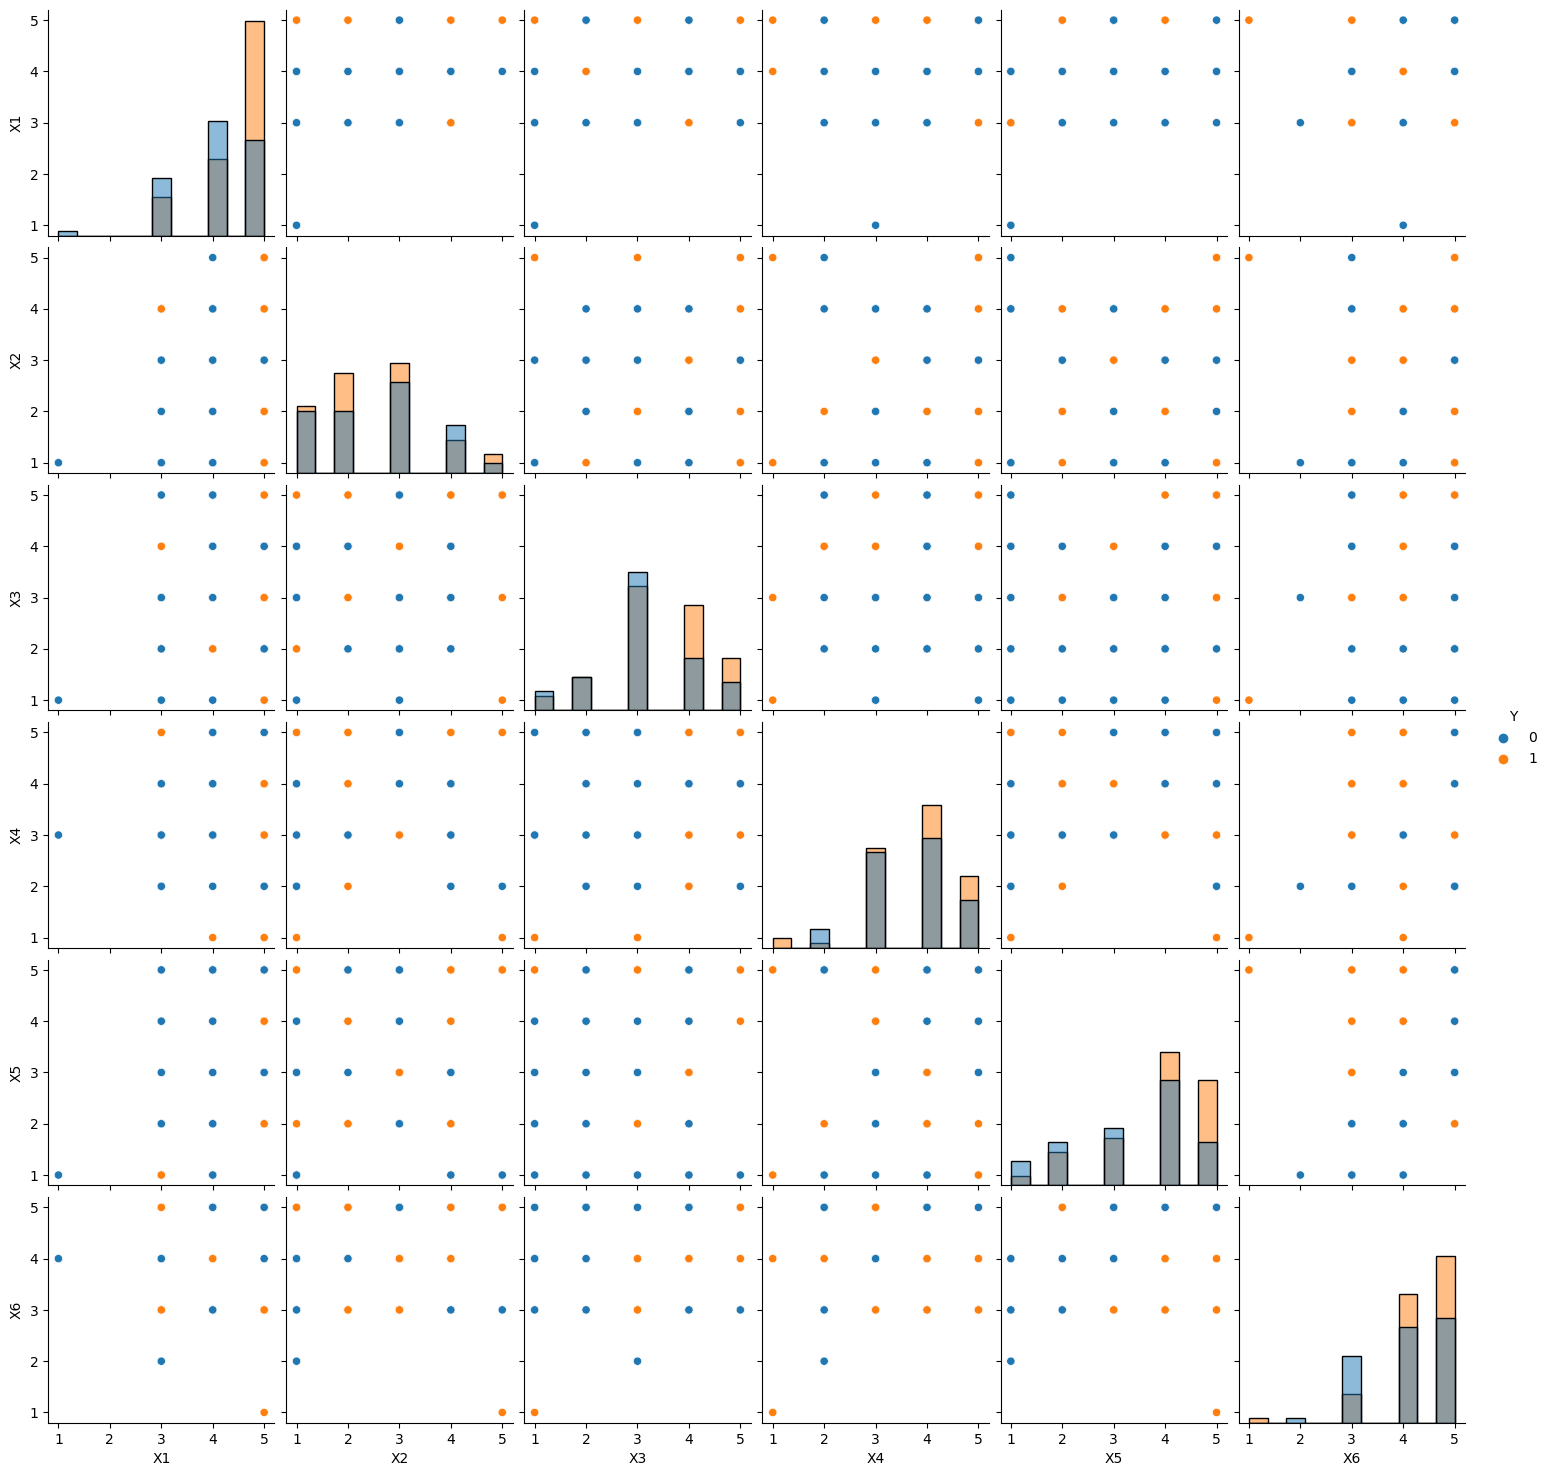

<Figure size 640x480 with 0 Axes>

In [7]:
sns.pairplot(happiness, hue = 'Y', diag_kind="hist")
plt.show()
plt.clf()

Based on these pairplots, it can be noticed that most of the variables are left-skewed distributed; it seems that customers tend to be happier when the answers of the questions reach the highest levels (4 and 5). ``X2`` and ``X3`` variables are roughly normal distributed, which means that the contents of the order might determine customer's happiness level equally likely.

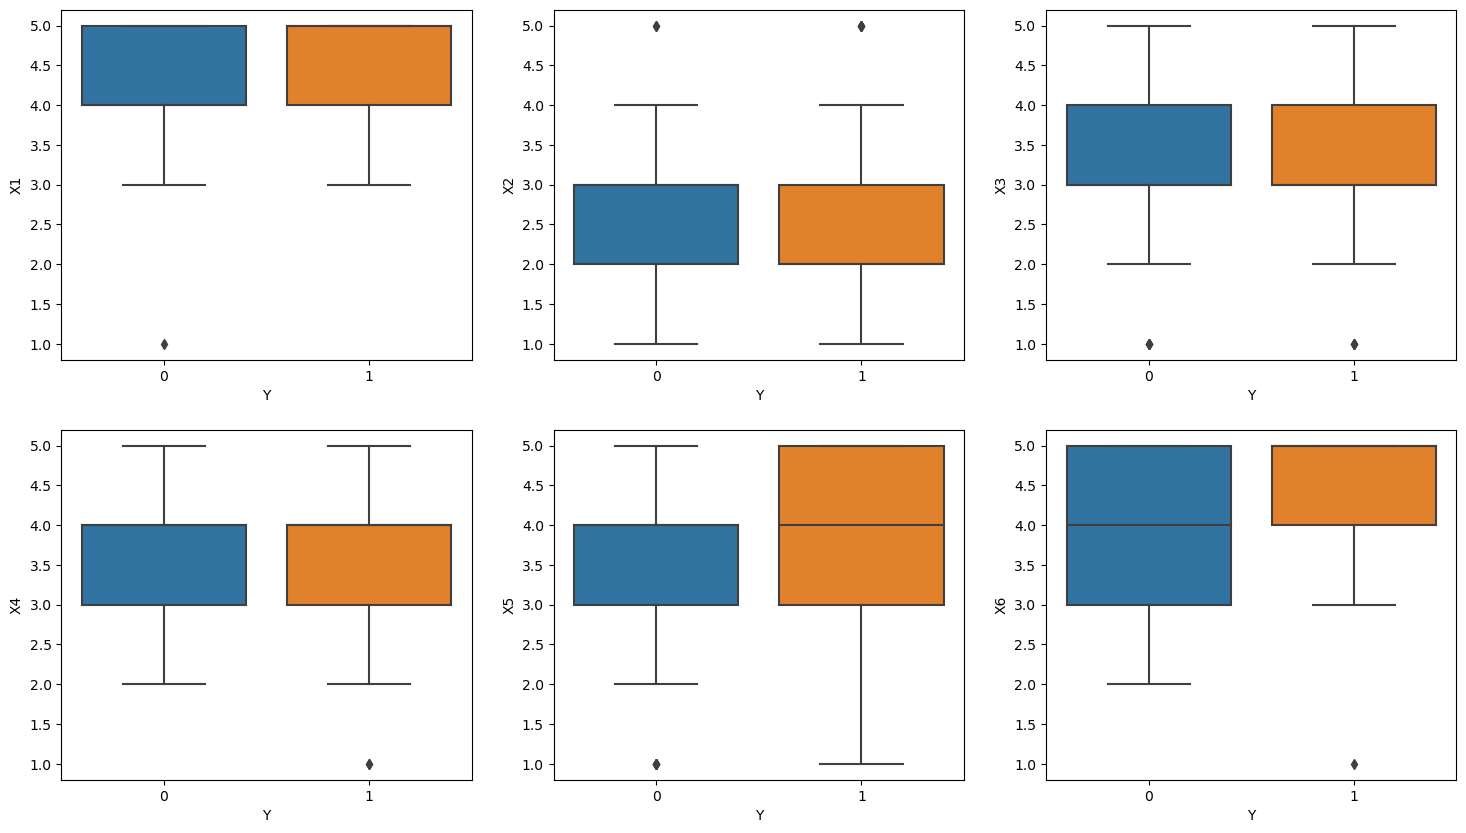

In [8]:
fig, axes = plt.subplots(2,3,figsize=(18, 10))
sns.boxplot(ax = axes[0,0],data = happiness, x = 'Y', y = 'X1')
sns.boxplot(ax = axes[0,1],data = happiness, x = 'Y', y = 'X2')
sns.boxplot(ax = axes[0,2],data = happiness, x = 'Y', y = 'X3')
sns.boxplot(ax = axes[1,0],data = happiness, x = 'Y', y = 'X4')
sns.boxplot(ax = axes[1,1],data = happiness, x = 'Y', y = 'X5')
sns.boxplot(ax = axes[1,2],data = happiness, x = 'Y', y = 'X6')
plt.show()
plt.clf()

Based on these boxplots, it can be noticed that there is a lot of overlapping between the boxes for every variable based on the target variable outputs; due to overlapping, it may not exist any association between the variables at all.

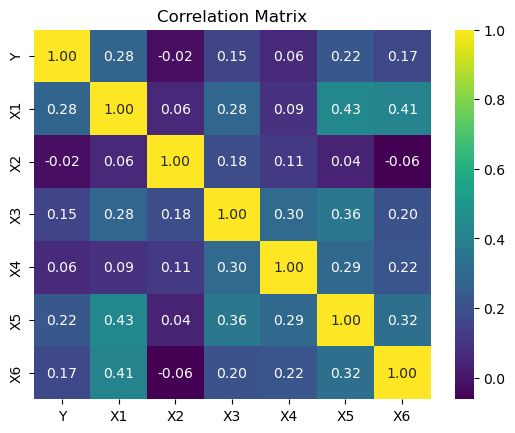

In [9]:
corr_matrix = happiness.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'viridis', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()
plt.clf()

The correlation matrix is very helpful to determine how variables are correlated with each other. Based on this heatmap, it can be noticed that there is a weak positive correlation between most of the variables, and variables such as ``X2`` and ``X6`` have weak negative correlation with the rest of the variables or have no correlation at all due to their closeness to 0. 

## Happiness Prediction

This step is focused on how to predict whether or not customers are happy by training different machine learning models. We train a logistic model and some deep learning models for happiness prediction. For each model, the data is split into training data and test data with sizes of 80% and 20%, respectively. Additionally, evaluation metrics will be reported.

### Logistic Regression Model

This model uses the sigmoid function to link the log-odds of a data point to the range [0,1]. Since the only outcomes of the target variable ``Y`` are 0(Unhappy) and 1(Happy), the logistic regression model is very useful since the sigmoid function provides a probability for the classification decision (Happy or Unhappy).  

In [10]:
X = happiness.drop(['Y'],axis = 1)
X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [11]:
y = happiness.Y
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Y, dtype: int64

In [12]:
import random 
#seed = random.randint(1000,9999)
seed = 1742 
print(seed)

1742


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = seed)

#fit logistic model
logit_model = LogisticRegression(random_state = seed)
logit_model.fit(X_train, y_train)
coefficients = logit_model.coef_
intercept = logit_model.intercept_
y_pred = logit_model.predict(X_test)
print('Coefficients: ', coefficients)
print('Intercept: ', intercept)

Coefficients:  [[ 0.40278705 -0.00244338  0.11830643 -0.01716095  0.09746295 -0.14399816]]
Intercept:  [-1.75719787]


Based on this output, the logistic regression model can be described with the formula: <br>
$\log\left(\cfrac{P(Y = 1)}{P(Y = 0)}\right) = -1.75719787 + .40278705X_1 - .00244338X_2 + .11830643X_3 - .01716095X_4 + .09746295X_5 - .14399816X_6$ <br>, where the link function is the natural log of the ratio of the probability that a customer is happy to the probability that a customer is unhappy.

In [14]:
#predicted outcomes
y_pred = logit_model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0])

In [15]:
y_test

100    1
75     0
36     1
77     1
120    0
85     1
40     0
62     1
32     1
105    1
7      1
58     1
109    1
103    1
25     0
49     1
122    1
93     1
84     0
106    1
94     0
1      0
50     1
124    0
12     1
64     1
Name: Y, dtype: int64

In [16]:
#probabilities
prob_pred = logit_model.predict_proba(X_test)[:,1]
prob_pred

array([0.54664983, 0.39259246, 0.58443611, 0.57157723, 0.47856994,
       0.55181014, 0.60244939, 0.60438179, 0.38242202, 0.60905955,
       0.57966706, 0.60467804, 0.61487436, 0.49190029, 0.37936546,
       0.59184302, 0.50326526, 0.57966706, 0.4675794 , 0.63683822,
       0.39622579, 0.41903121, 0.59184302, 0.45084842, 0.60027127,
       0.48791275])

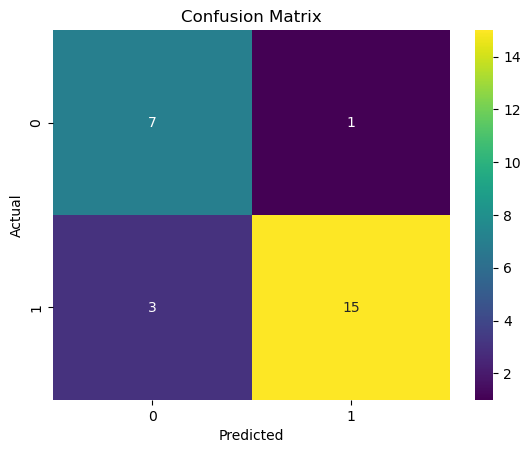

In [17]:
conf_mtx = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(conf_mtx), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [18]:
names = ['Unhappy', 'Happy']
print(classification_report(y_test, y_pred, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.70      0.88      0.78         8
       Happy       0.94      0.83      0.88        18

    accuracy                           0.85        26
   macro avg       0.82      0.85      0.83        26
weighted avg       0.86      0.85      0.85        26



<Figure size 640x480 with 0 Axes>

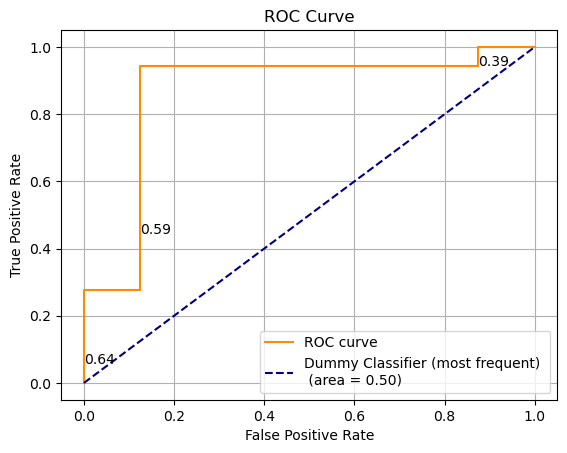

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, prob_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
idx = list(range(len(thresholds)))[1::4]

for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))
    
clf = DummyClassifier(strategy='most_frequent', random_state=seed)
clf.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--',
         label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()
plt.clf()

In [20]:
roc_auc = roc_auc_score(y_test, prob_pred)
print(roc_auc)

0.8680555555555555


Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The predicted probabilities obtained from the model estimated whether the customer is happy or not; using a threshold of 0.50, it can be easy to predict customers' happiness
- The confusion matrix indicates the True Negatives, True Positives, False Positives, and False Negatives proportions, and such proportions are helpful to calculate the precision, recall, f1-score, and accuracy for model evaluation
- The model's accuracy is 0.85, which indicates that the model has a little bias predicting more happy customers than unhappy
- The Receiving Operating Characteristic (ROC) curve can be obtained by calculating and plotting the True Positive Rate vs. the False Positive Rate. The Area Under the Curve (AUC) is helpful to determine how well the model can distinghish between the two classes (0 and 1). Since the Area Under the Curve is approximately equal to 0.87 and is close to 1, this indicates that the logistic regression model is almost a perfect classifier

## Other Classifiers
On this step, some other classifiers will be implemented to determine if the accuracy can be improved from the previous model.

In [21]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
classifier = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = classifier.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 29/29 [00:00<00:00, 39.81it/s]

[LightGBM] [Info] Number of positive: 51, number of negative: 49
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510000 -> initscore=0.040005
[LightGBM] [Info] Start training from score 0.040005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.92,0.94,0.94,0.93,0.01
NearestCentroid,0.85,0.89,0.89,0.85,0.01
LinearSVC,0.85,0.85,0.85,0.85,0.01
LinearDiscriminantAnalysis,0.85,0.85,0.85,0.85,0.01
RidgeClassifierCV,0.85,0.85,0.85,0.85,0.01
RidgeClassifier,0.85,0.85,0.85,0.85,0.02
LogisticRegression,0.85,0.85,0.85,0.85,0.01
SGDClassifier,0.77,0.83,0.83,0.78,0.01
GaussianNB,0.81,0.83,0.83,0.81,0.01


### Naive Bayes Classifier
This model's algorithm is based on Bayes' theorem of probability for prediction of an unknown class. This model assumes that the effect of a particular answer of any question for either class (Happy or Unhappy) is independent of other answers from other questions, which is why this model is considered naive.

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
y_pred_gnb

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0])

In [23]:
#probabilities
prob_pred_gnb = gnb_model.predict_proba(X_test)[:,1]
prob_pred_gnb

array([0.58638774, 0.26183186, 0.65043978, 0.7062565 , 0.38744363,
       0.57672317, 0.52469941, 0.68267234, 0.32502922, 0.66649062,
       0.65188116, 0.76809177, 0.62156684, 0.47056113, 0.21247042,
       0.533327  , 0.46073587, 0.65188116, 0.41284595, 0.7219487 ,
       0.25984269, 0.34971572, 0.533327  , 0.49758377, 0.7509238 ,
       0.43269643])

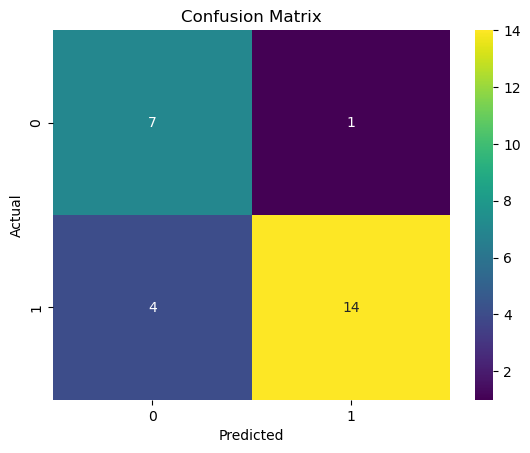

In [24]:
conf_mtx_2 = metrics.confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(pd.DataFrame(conf_mtx_2), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [25]:
print(classification_report(y_test, y_pred_gnb, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.64      0.88      0.74         8
       Happy       0.93      0.78      0.85        18

    accuracy                           0.81        26
   macro avg       0.78      0.83      0.79        26
weighted avg       0.84      0.81      0.81        26



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The model's accuracy is 0.81, which indicates that the model has a little bias predicting more happy customers than unhappy

### Linear SVC 
This model's main objective is to find the maximum separating hyperplane (or a set of hyerplanes) between the different variables in the target variable.

In [26]:
from sklearn import svm
linear_clf = svm.SVC(kernel = 'linear')
linear_clf.fit(X_train, y_train)
y_pred_svc = linear_clf.predict(X_test)
y_pred_svc

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1])

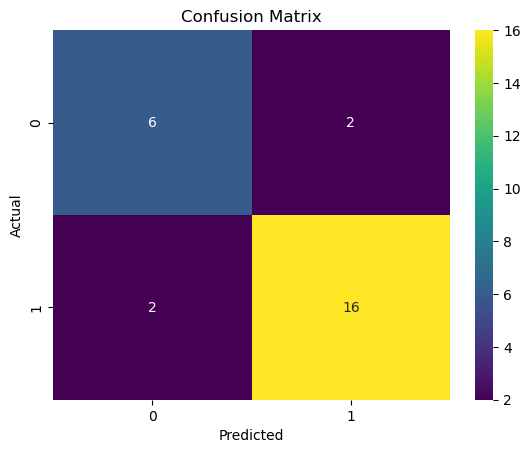

In [27]:
conf_mtx_3 = metrics.confusion_matrix(y_test,y_pred_svc)
sns.heatmap(pd.DataFrame(conf_mtx_3), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [29]:
print(classification_report(y_test, y_pred_svc, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.75      0.75      0.75         8
       Happy       0.89      0.89      0.89        18

    accuracy                           0.85        26
   macro avg       0.82      0.82      0.82        26
weighted avg       0.85      0.85      0.85        26



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The model's accuracy is 0.85, which indicates that the model has a little bias predicting more happy customers than unhappy

### Bernoulli NB Classifier
This model's algorithm classifies data that contains binary-valued features (0 and 1). For this model, it is required to convert every predictor variable as a binary-feature vector.

In [30]:
from sklearn.naive_bayes import BernoulliNB
#Get binary-feature vectors for training data and test data
X_train_0_1 = np.where(X_train < 4,0,1) #Highest levels: 4 and 5
X_train_0_1 = pd.DataFrame(X_train_0_1,columns = ['X1','X2','X3','X4','X5','X6'])

X_test_0_1 = np.where(X_test < 4,0,1)
X_test_0_1 = pd.DataFrame(X_test_0_1,columns = ['X1','X2','X3','X4','X5','X6'])

bern_clf = BernoulliNB()
bern_clf.fit(X_train_0_1, y_train)
bern_pred = bern_clf.predict(X_test_0_1)
bern_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

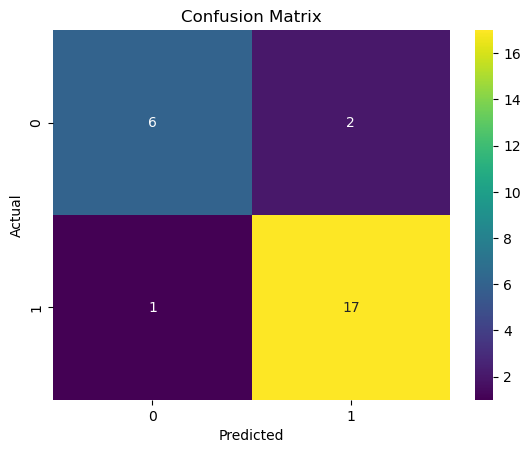

In [31]:
conf_mtx_4 = metrics.confusion_matrix(y_test,bern_pred)
sns.heatmap(pd.DataFrame(conf_mtx_4), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [32]:
print(classification_report(y_test, bern_pred, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.86      0.75      0.80         8
       Happy       0.89      0.94      0.92        18

    accuracy                           0.88        26
   macro avg       0.88      0.85      0.86        26
weighted avg       0.88      0.88      0.88        26



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The model's accuracy is 0.88, which indicates that the model has a little bias predicting more happy customers than unhappy

### Bagging Classifier
Bagging (Bootstrap Aggregation) is a technique for reducing the variance of an estimated prediction function. A committee of trees each cast a vote for the predicted class (Happy or Unhappy).

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 6,random_state = seed)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
y_pred_bagging

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

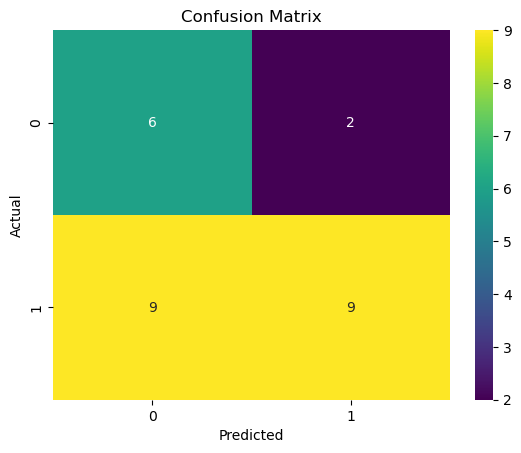

In [34]:
conf_mtx_5 = metrics.confusion_matrix(y_test,y_pred_bagging)
sns.heatmap(pd.DataFrame(conf_mtx_5), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [35]:
print(classification_report(y_test, y_pred_bagging, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.40      0.75      0.52         8
       Happy       0.82      0.50      0.62        18

    accuracy                           0.58        26
   macro avg       0.61      0.62      0.57        26
weighted avg       0.69      0.58      0.59        26



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The vast majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The model's accuracy is 0.58, which indicates that the model has more bias predicting more happy customers than unhappy

## Random Search Hyperparameter Optimization
The accuracy for every single predictive model was significantly high. However, a random search hyperparameter optimization will be required to improve the accuracy of the happiness prediction. This method searches for a range of values to a subset of the dataset to obtain the best performance of the models. Randomized search and grid search are the most common methods for hyperparameter optimization.

### Randomized Search

In [36]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = seed) 
param_grid = { 
    'n_estimators': [i for i in range(0,7)], 
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': np.linspace(0.1, 1, 11), 
    'bootstrap': [True, False] 
} 

random_search = RandomizedSearchCV( 
  rf, 
  param_grid,  
  cv=5,  
  n_iter=10,  
  random_state=seed) 
random_search.fit(X, y) 

print("Best Parameters: {}\n Best Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'n_estimators': 5, 'min_samples_split': 0.1, 'max_depth': 10, 'bootstrap': False}
 Best Score: 0.6504615384615383


### Grid Search 

In [37]:
grid_search = GridSearchCV(rf, param_grid,cv=5,scoring = 'accuracy')
grid_search.fit(X,y)
print("Best Parameters: {}\n Best Score: {}".format(grid_search.best_params_, grid_search.best_score_))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 0.1, 'n_estimators': 6}
 Best Score: 0.6587692307692308


Based on these results, it can be noticed that randomized search and grid search methods obtained similar best scores to obtain the best performance of the models. They also suggest that the majority or all of the variables must be taken under consideration.

## Ensemble Learning Models
The next step in this project is training *ensemble learning* models to predict the happiness of the customers. The *ensemble learning* models considered are Stacking and Hard Voting Classifiers.

### Stacking Classifier
Stacking Classifier uses multiple classification models to make baseline predictions. It uses a meta-classifier for the classification task. The models used on this classifier are *Naive Bayes*, *Linear SVC*, and *Bernoulli NB*.

In [52]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('Naive Bayes',gnb_model), ('Linear SVC',linear_clf),
                                                 ('Bernoulli NB',bern_clf)]
stack_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(random_state = seed)
)

stack_clf.fit(X_train, y_train)
y_pred_stacking = stack_clf.predict(X_test)
y_pred_stacking

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1])

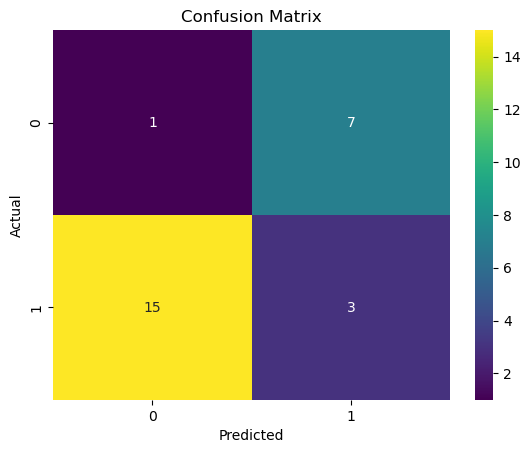

In [53]:
conf_mtx_6 = metrics.confusion_matrix(y_test,y_pred_stacking)
sns.heatmap(pd.DataFrame(conf_mtx_6), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [54]:
print(classification_report(y_test, y_pred_stacking, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.06      0.12      0.08         8
       Happy       0.30      0.17      0.21        18

    accuracy                           0.15        26
   macro avg       0.18      0.15      0.15        26
weighted avg       0.23      0.15      0.17        26



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The vast majority of the predicted values for ``Y`` are not as equal as the test values from the test data
- The model's accuracy is 0.15, which indicates that the model has a lot of bias predicting more happy customers than unhappy

### Hard Voting Classifier
Like any other ensemble learning model, hard voting classifier learns from the results of some classifiers and predicts the final output based on the majority of votes of a particular class. The models used on this classifier are *Logistic Regression*, *Linear SVC*, and *Bernoulli NB*.

In [41]:
from sklearn.ensemble import VotingClassifier
models = ['Logistic Regression', 'Linear SVC', 'Bernoulli NB'] #Best Accuracies
voting_clf_hard = VotingClassifier(estimators = [(models[0],logit_model), (models[1],linear_clf),
                                                 (models[2],bern_clf)], voting = 'hard')
voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_hard

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1])

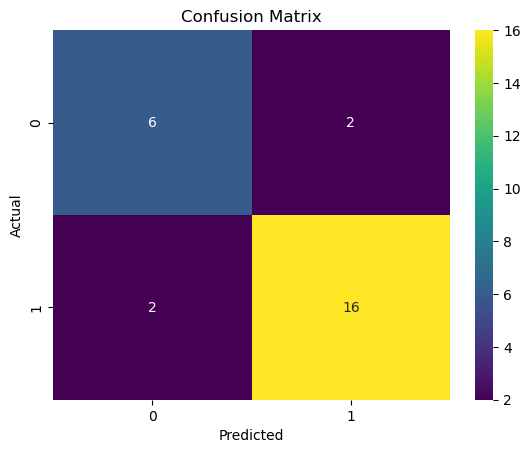

In [42]:
conf_mtx_7 = metrics.confusion_matrix(y_test,y_pred_hard)
sns.heatmap(pd.DataFrame(conf_mtx_7), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [43]:
print(classification_report(y_test, y_pred_hard, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.75      0.75      0.75         8
       Happy       0.89      0.89      0.89        18

    accuracy                           0.85        26
   macro avg       0.82      0.82      0.82        26
weighted avg       0.85      0.85      0.85        26



Based on these evaluation metrics, it can be noticed some interesting features of this model:
- The majority of the predicted values for ``Y`` are as equal as the test values from the test data
- The model's accuracy is 0.85, which indicates that the model has a little bias predicting more happy customers than unhappy

## Recursive Feature Elimination
Recursive Feature Elimination is a selection method that iteratively remove less significant features, and it keeps the ones that enhance predictive accuracy. This method is significantly better to determine which features are more important.

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

selected = SelectFromModel(LogisticRegression(C = .5, penalty = 'l1', solver = 'liblinear', random_state = seed))
selected.fit(scaler.transform(X_train),y_train)

print(selected.get_support())
print(X_train.columns[(selected.estimator_.coef_==0).ravel().tolist()])

[ True False  True False  True False]
Index(['X2', 'X4', 'X6'], dtype='object')


In [45]:
X_train_selected = selected.transform(scaler.transform(X_train))
X_test_selected = selected.transform(scaler.transform(X_test))
print(X_train_selected.shape)
print(X_test_selected.shape)

(100, 3)
(26, 3)


LASSO stands for *Least Absolute Shrinkage and Selection Operator* and has the ability to set some coefficients to zero. This is the penalty selected for the recursive feature elimination, and based on the results above, it can be noticed that `X2`, `X4`, and `X6` are the features (variables) that need to be eliminated to improve the accuracy of the models. Now the training and test datasets have 3 remaining features.

### Refitting Logistic Regression Model
Based on previous results, the logistic regression model can be trained with the 3 remaining features obtained from recursive feature elimination (`X1`, `X3`, and `X5`).

In [46]:
logit_model_2 = LogisticRegression(random_state = seed)
logit_model_2.fit(X_train_selected, y_train)
coefficients_2 = logit_model_2.coef_
intercept_2 = logit_model_2.intercept_
y_pred_2 = logit_model_2.predict(X_test_selected)
print('Coefficients: ', coefficients_2)
print('Intercept: ', intercept_2)

Coefficients:  [[0.29409835 0.11325627 0.09789382]]
Intercept:  [0.03717354]


Based on this output, the logistic regression model can be described with the formula: <br>
$\log\left(\cfrac{P(Y = 1)}{P(Y = 0)}\right) = .03717354 + .29409835X_1 + .11325627X_3 + .09789382X_5$ <br>, where the link function is the natural log of the ratio of the probability that a customer is happy to the probability that a customer is unhappy.

In [47]:
#predicted outcomes
y_pred_2 = logit_model_2.predict(X_test_selected)
y_pred_2

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0])

In [48]:
y_test

100    1
75     0
36     1
77     1
120    0
85     1
40     0
62     1
32     1
105    1
7      1
58     1
109    1
103    1
25     0
49     1
122    1
93     1
84     0
106    1
94     0
1      0
50     1
124    0
12     1
64     1
Name: Y, dtype: int64

In [49]:
#probabilities
prob_pred_2 = logit_model_2.predict_proba(X_test_selected)[:,1]
prob_pred_2

array([0.56911229, 0.39128723, 0.59909313, 0.59460797, 0.44368209,
       0.57367728, 0.55247927, 0.61960341, 0.41651722, 0.61960341,
       0.59909313, 0.6239869 , 0.59909313, 0.48653402, 0.3510882 ,
       0.57367728, 0.53108877, 0.59909313, 0.46504355, 0.64398046,
       0.33171542, 0.39128723, 0.57367728, 0.48187866, 0.61960341,
       0.48187866])

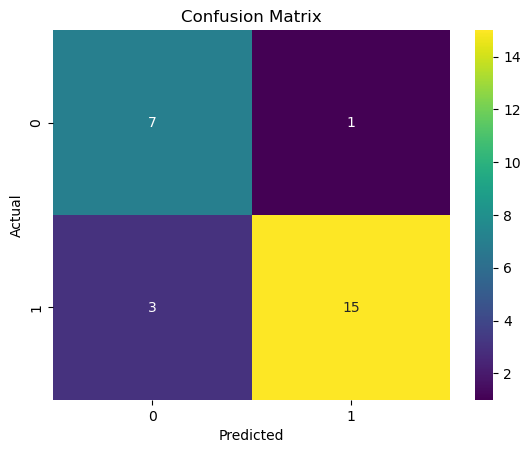

In [50]:
conf_mtx_8 = metrics.confusion_matrix(y_test,y_pred_2)
sns.heatmap(pd.DataFrame(conf_mtx_8), annot = True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.clf()

In [51]:
print(classification_report(y_test, y_pred_2, target_names = names))

              precision    recall  f1-score   support

     Unhappy       0.70      0.88      0.78         8
       Happy       0.94      0.83      0.88        18

    accuracy                           0.85        26
   macro avg       0.82      0.85      0.83        26
weighted avg       0.86      0.85      0.85        26



Based on the outputs above, it can be noticed that the accuracy and the other model evaluation metrics are exactly the same as the previous model's. 

## Conclusion
The primary objective of this project was to predict if a customer is happy or not based on the answers they have given to the questions asked based on different predictive models. Based on the different approaches performed, there are some interesting insights about the project:
- Based on the exploratory data analysis performed, the distribution for most of the variables is right-skewed, which indicates that most customers tend to be happy when their answers to the questions are in the highest levels (4 and 5). It seems to be a weak or no correlation at all between every single question, but further analysis demonstrates that there are some questions that are more relevant for happiness prediction than others.
- The Logistic Regression model has a relatively high accuracy score (0.85), and so for the other scores for each class (Happy and Unhappy) based on the confusion matrix. Also, the Receiving Operating Characteristic (ROC) Curve has an area under the curve of 0.87 (relatively close to 1), which indicates the measure of the logistic model's ability to distinguish the customers that are happy against the ones that are not. 
- Some other trained models, such as Naive Bayes Classifier, Linear SVC Classifier, Bernoulli NB Classifier, and Hard Voting Classifier have as relatively high accuracy scores as the Logistic Regression's. It happens to notice that not only the accuracy score from such models, but also the precision, recall, and f1 scores for each class (Happy and Unhappy) are relatively high and close to 1 based on the confusion matrices, which means that each class has a relatively high true prediction than a false one.
- The Random Search Hyperparameter Optimization and Recursive Feature Elimination methods were considered to select a set of variables that have more relative importance than others to improve the accuracy of the trained models. However, Random Search Hyperparameter Optimization suggested to consider every single variable, and Recursive Feature Elimination determined to not consider the expected contents of the order (`X2`), the price of the order was good (`X4`), and the easiness of the app for ordering (`X6`).
- This logistics and delivery startup might give partial importance to such questions to determine whether a customer is happy or not because it might tend to some bias; a logistic model was trained with the remaining questions and yielded the same results on the classification report from the original trained logistic model. The remaining models might yield the same or better prediction results with the remaining three questions, but every question has either the same or higher importance for happiness prediction. 